In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from os.path import join as oj
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np
from sklearn.datasets import make_classification
from torch import nn
import torch.nn.functional as F
import torch
from copy import deepcopy
from sklearn import metrics
plt.style.use('dark_background')
import mat4py
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
fname = '/Users/chandan/drive/research/abc_image_understanding/auxilin_data/A7D2/Cell1_1s/TagRFP/Tracking/ProcessedTracks.mat'

In [24]:
# mat = scipy.io.loadmat(fname)
mat = mat4py.loadmat(fname)

In [25]:
mat.keys()

dict_keys(['tracks', 'processingInfo'])

In [26]:
mat['tracks'].keys()

dict_keys(['t', 'f', 'x', 'y', 'A', 'c', 'x_pstd', 'y_pstd', 'A_pstd', 'c_pstd', 'sigma_r', 'SE_sigma_r', 'pval_Ar', 'isPSF', 'tracksFeatIndxCG', 'gapVect', 'gapStatus', 'gapIdx', 'seqOfEvents', 'nSeg', 'visibility', 'lifetime_s', 'start', 'end', 'startBuffer', 'endBuffer', 'MotionAnalysis', 'maskA', 'maskN', 'RSS', 'mask_Ar', 'hval_Ar', 'hval_AD', 'catIdx', 'isCCP', 'significantMaster', 'significantVsBackground', 'significantSlave'])

In [34]:
df = pd.DataFrame.from_dict(mat['tracks'])

In [ ]:
df

In [37]:
row = df.iloc[0]

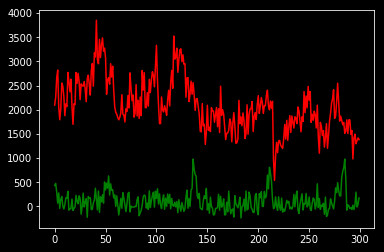

In [57]:
# 0 is the first channel (clathrin)
plt.plot(row.A[0], color='red', label='clathrin')
plt.plot(row.A[1], color='green', label='auxilin')

# other features

In [60]:
row['MotionAnalysis']

{'totalDisplacement': 1.9938507484087236,
 'MSD': [0.8199166461603705,
  0.9184125057581701,
  1.0746293815181283,
  1.2579823918218476,
  1.2848813619886308,
  1.4878657727122817,
  1.6159649357150125,
  1.7597394498959877,
  1.9591360848544215,
  2.095208117137245],
 'MSDstd': [1.4636975229046356,
  1.8281712589112826,
  2.01110331265816,
  2.2294585971836347,
  2.246964652794261,
  2.486308772360949,
  2.7906320700363314,
  3.0395311327062347,
  3.325794272379587,
  3.3741494924186766]}

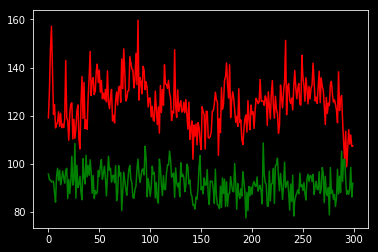

In [59]:
# 0 is the first channel (clathrin)
plt.plot(row.A_pstd[0], color='red', label='clathrin')
plt.plot(row.A_pstd[1], color='green', label='auxilin')

In [49]:
row

t                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
f                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
x                          [[210.87023539816366, 209.95823254317503, 209....
y                          [[214.93029141282955, 215.22867716489355, 215....
A                          [[2096.756403720057, 2258.8564209974024, 2661....
c                          [[1916.9647462219516, 1977.1107815752987, 1968...
x_pstd                     [[0.1551586205733608, 0.15779799594087435, 0.1...
y_pstd                     [[0.1551586157223754, 0.1577979960845669, 0.15...
A_pstd                     [[119.09216200466652, 130.44837449746328, 147....
c_pstd                     [[23.483064732096953, 25.68637758011883, 29.16...
sigma_r                    [[405.44331530574806, 444.2253032394948, 501.9...
SE_sigma_r                 [[15.194630645659947, 16.62471414796989, 18.86...
pval_Ar                    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...